In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load the dataset
df = pd.read_csv('EmailsDataSet.csv')

In [3]:
# Use half of DataSet
df = df.loc[0:99999,:]

In [4]:
# Perform any necessary text preprocessing (e.g., lowercasing, removing stop words, etc.)
# Explore and Preprocess the Data
# Display the first few rows of the dataset
print(df.head())
# Check for missing values
print(df.isnull().sum())
# Replace NaN values with empty strings
df['message'] = df['message'].fillna('')
# Check the number of unique files
print(df['file'].nunique())
# Remove unnecessary columns
df = df[['message', 'file']]
# Drop duplicates
df = df.drop_duplicates()

                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
file       0
message    0
dtype: int64
100000


In [5]:
# Text Preprocessing
# Import and install libraries
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /home/saeid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/saeid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Text Preprocessing
# Preprocess the email text by removing stopwords, and punctuation, and performing stemming/lemmatization.
# We should regulate this part to have a clean text
# Define a list of words to exclude
exclude_words = ['com', 'net', 'cc', 'bcc', 'subject', 'www', 'mail', 'javamail', 'evans', 'messag', 'id', 'thyme', 'date', 'pdt', 'phillip', 'http', 'enron', 'allen', 'messag', 'sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']
# Create a regular expression pattern to match words to be excluded
exclude_pattern = '|'.join(r'\b{}\b'.format(re.escape(word)) for word in exclude_words)
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  #Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z]', ' ', text) #Remove non-alphabetic characters
    text = re.sub(exclude_pattern, ' ', text, flags=re.IGNORECASE) #Remove excluded words from the text
    text = text.lower() #Convert to lowercase
    return text
df['cleaned_message'] = df['message'].apply(clean_text)
print(df.head())

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                       file                                    cleaned_message  
0     allen-p/_sent_mail/1.  message                                       ...  
1    allen-p/_sent_mail/10.  message                                       ...  
2   allen-p/_sent_mail/100.  message                                       ...  
3  allen-p/_sent_mail/1000.  message                                       ...  
4  allen-p/_sent_mail/1001.  message                                       ...  


In [7]:
# stopwords
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)
df['processed_message'] = df['cleaned_message'].apply(preprocess_text)
#df.to_csv('EmailsDataSet_Processed.csv')
print(df.head())

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                       file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                     cleaned_message  \
0  message                                       ...   
1  message                                       ...   
2  message                                       ...   
3  message                                       ...   
4  message                                       ...   

                                   processed_message  
0  messag may tim belden mime version content typ...  
1  messag may john lavorato m

In [8]:
# Convert text data to document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['processed_message'])

# Fit LDA model
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(dtm)

# Display topics and associated words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Display the topics
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 1:
cn recipi na ou privileg non pst blair lynn john

Topic 2:
ect hou beck salli edu berkeley bass haa pm eric

Topic 3:
john pleas ascii pst sent note arnold campbel non larri

Topic 4:
dasovich jeff ee ca jdasov jame susan note na richard

Topic 5:
said power compani state energi td market price california new



In [9]:
#!pip install sentence_transformers
# Import necessary libraries
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.decomposition import LatentDirichletAllocation
#from sentence_transformers import SentenceTransformer
#from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
#df = pd.read_csv('EmailsDataSet_Processed.csv')

In [10]:
# Use BERT for embedding the text
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Embed the messages
embeddings = model.encode(df['processed_message'], show_progress_bar=True)

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

In [17]:
#np.savetxt('BERTResult.txt',embeddings,fmt='%f')

In [3]:
## Restore Point
embeddings = np.loadtxt('BERTResult.txt',dtype=float)

In [4]:
# Calculate cosine similarity between embeddings
similarity_matrix = cosine_similarity(embeddings[0:20000,:], embeddings[0:20000,:])

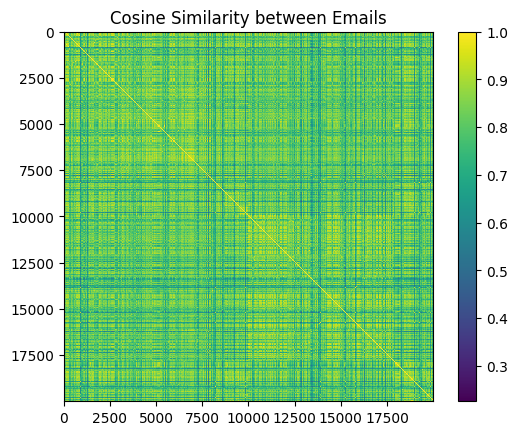

In [5]:
#embeddings = embeddings.astype(np.uint8)
# Visualize similarity matrix
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.title('Cosine Similarity between Emails')
plt.colorbar()
plt.show()

In [6]:
# Perform evaluation and visualization (accuracy, confusion matrix)
# For LDA, we assign a label to each document based on the most probable topic
df['lda_topic'] = lda_output.argmax(axis=1)

# Visualize topic distribution
plt.figure(figsize=(10, 6))
df['lda_topic'].value_counts().sort_index().plot(kind='bar')
plt.title('Topic Distribution using LDA')
plt.xlabel('Topic')
plt.ylabel('Number of Emails')
plt.show()

NameError: name 'lda_output' is not defined